# ==============================================================
# Name - Abhishek Kumar.
# Batch Number -  DS2309.
# ==============================================================
# **********************************************************************************************
# Project Name:- Rainfall Weather Forecasting 
# **********************************************************************************************

# Project Description
Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.


Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:
 * Problem Statement:

a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b)  Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.


# Dataset Link-  

•	https://raw.githubusercontent.com/dsrscientist/dataset3/main/weatherAUS.csv


## Importing Required Libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [4]:
df=pd.read_csv(r"C:\Users\ASHISH\Downloads\weatherAUS.csv")

In [7]:
df.tail(60)

,Date,Location,MinTemp,MaxTemp,Rainfall,Evaporation,Sunshine,WindGustDir,WindGustSpeed,WindDir9am,...,Humidity9am,Humidity3pm,Pressure9am,Pressure3pm,Cloud9am,Cloud3pm,Temp9am,Temp3pm,RainToday,RainTomorrow
8365,2012-10-21,Darwin,24.8,33.3,0.0,7.8,10.5,NW,41.0,ENE,...,58.0,50.0,1012.0,1007.2,2.0,1.0,29.5,31.7,No,No
8366,2012-10-22,Darwin,24.2,33.4,0.6,7.0,7.8,NW,33.0,NE,...,63.0,49.0,1011.2,1006.7,5.0,2.0,29.9,32.2,No,No
8367,2012-10-23,Darwin,24.2,35.2,0.6,5.2,11.5,NNE,35.0,S,...,67.0,40.0,1010.6,1006.2,1.0,1.0,28.6,33.6,No,No
8368,2012-10-24,Darwin,23.5,35.3,0.4,7.6,11.3,NNE,41.0,NE,...,69.0,41.0,1010.5,1005.7,4.0,2.0,29.6,34.3,No,No
8369,2012-10-25,Darwin,25.4,33.6,0.0,8.8,8.2,ESE,30.0,E,...,66.0,51.0,1011.3,1006.9,6.0,7.0,29.4,32.5,No,No
8370,2012-10-26,Darwin,24.7,34.3,0.2,5.8,10.0,NNW,35.0,NE,...,61.0,46.0,1011.1,1007.0,7.0,3.0,30.7,33.9,No,No
8371,2012-10-27,Darwin,25.2,34.1,0.0,7.6,10.2,NW,37.0,WSW,...,72.0,61.0,1010.5,1006.5,5.0,3.0,29.9,32.1,No,Yes
8372,2012-10-28,Darwin,22.9,32.8,5.8,7.4,4.4,N,57.0,N,...,96.0,61.0,1012.1,1007.4,8.0,5.0,23.4,32.0,Yes,Yes
8373,2012-10-29,Darwin,23.3,34.2,3.2,5.0,10.2,ENE,35.0,NE,...,60.0,56.0,1011.1,1007.0,3.0,2.0,29.9,32.0,Yes,No
8374,2012-10-30,Darwin,25.5,34.1,0.0,6.8,10.5,NNW,30.0,NNW,...,67.0,50.0,1010.9,1007.0,5.0,1.0,29.8,33.5,No,No


In [8]:
df.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [9]:
print('Number of Rows:',df.shape[0])
print('Number of Columns:',df.shape[1])

Number of Rows: 8425
Number of Columns: 23


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

## Extracting Date,Month and Year from Date column

In [12]:
# Date column is act as object, so convert it into datetime datatype.
df['Date']=pd.to_datetime(df['Date'])

In [13]:
df['Day']=df['Date'].dt.day
df['Month']=df['Date'].dt.month
df['Year']=df['Date'].dt.year

In [43]:
df.drop(columns=['Date'],inplace=True)

In [14]:
# This will check if any duplicate Value
df.duplicated().sum() 

1663

In [21]:
# Droping Duplicates 
df = df.drop_duplicates()

In [15]:
#check if any whitespace, 'NA' or '-' exist in dataset.
df.isin([' ','NA','-']).sum().any()

False

Comment:
* No whitespace, NA, '-' exist in dataset.

# Checking Null Values

Date                0
Location            0
MinTemp            75
MaxTemp            60
Rainfall          240
Evaporation      3512
Sunshine         3994
WindGustDir       991
WindGustSpeed     991
WindDir9am        829
WindDir3pm        308
WindSpeed9am       76
WindSpeed3pm      107
Humidity9am        59
Humidity3pm       102
Pressure9am      1309
Pressure3pm      1312
Cloud9am         2421
Cloud3pm         2455
Temp9am            56
Temp3pm            96
RainToday         240
RainTomorrow      239
Day                 0
Month               0
Year                0
dtype: int64


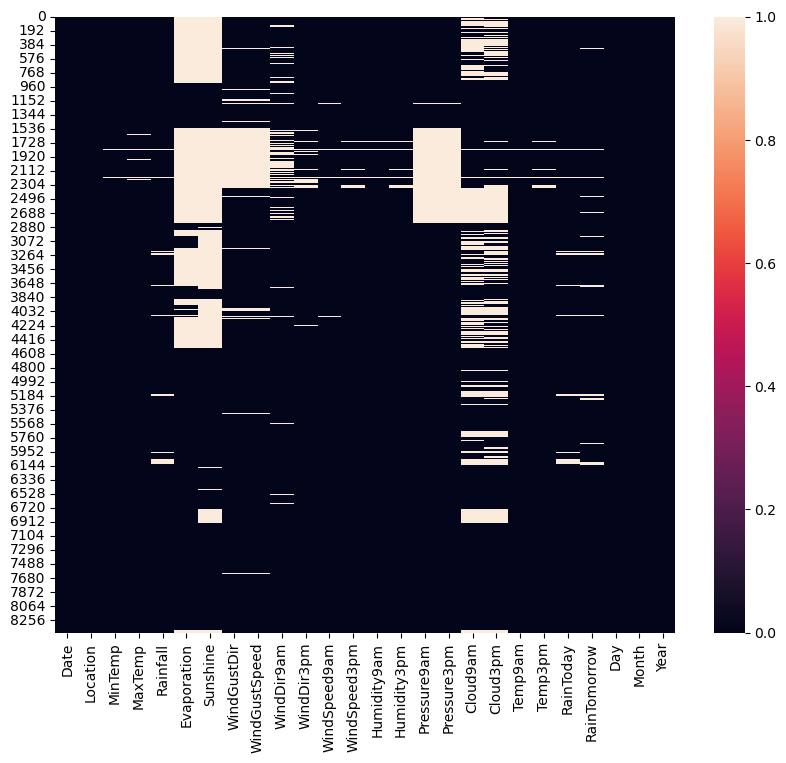

In [20]:
plt.figure(figsize=(10,8))
sns.heatmap(df.isna())
print(df.isnull().sum())

In [50]:
Null_percentage=(df.isnull().mean()*100).round(2)
Null_percentage.sort_values(ascending=False).apply(lambda x: f"{x}%")

Sunshine         47.86%
Evaporation       43.2%
Cloud3pm         28.13%
Cloud9am          27.6%
Pressure3pm      19.39%
Pressure9am      19.34%
WindGustDir      13.93%
WindGustSpeed    13.93%
WindDir9am       11.74%
WindDir3pm        4.35%
RainTomorrow      2.04%
RainToday         2.04%
Rainfall          2.04%
WindSpeed3pm      1.48%
Humidity3pm       1.42%
Temp3pm           1.36%
MinTemp           1.04%
WindSpeed9am      0.93%
MaxTemp           0.84%
Humidity9am        0.8%
Temp9am           0.75%
Month              0.0%
Location           0.0%
Day                0.0%
Year               0.0%
dtype: object

# Handling Nulls

In [60]:
#filling (WindGustDir,WindDir9am,WindSpeed9am) column With Mode of the column.
df['WindGustDir'].fillna(value=df['WindGustDir'].mode()[0], inplace= True)
df['WindDir9am'].fillna(value=df['WindDir9am'].mode()[0], inplace= True)
df['WindDir3pm'].fillna(value=df['WindDir3pm'].mode()[0], inplace= True)
df['RainToday'].fillna(value=df['RainToday'].mode()[0], inplace= True)
df['RainTomorrow'].fillna(value=df['RainTomorrow'].mode()[0], inplace= True)

In [61]:
#filling null column with mean value of column.
df['Sunshine'].fillna(value=df['Sunshine'].mean(), inplace= True)
df['Evaporation'].fillna(value=df['Evaporation'].mean(), inplace= True)
df['Cloud9am'].fillna(value=df['Cloud9am'].mean(), inplace= True)
df['Cloud3pm'].fillna(value=df['Cloud3pm'].mean(), inplace= True)
df['Pressure9am'].fillna(value=df['Pressure9am'].mean(), inplace= True)
df['Pressure3pm'].fillna(value=df['Pressure3pm'].mean(), inplace= True)
df['WindGustSpeed'].fillna(value=df['WindGustSpeed'].mean(), inplace= True)
df['Rainfall'].fillna(value=df['Rainfall'].mean(), inplace= True)
df['WindSpeed9am'].fillna(value=df['WindSpeed9am'].mean(), inplace= True)
df['WindSpeed3pm'].fillna(value=df['WindSpeed3pm'].mean(), inplace= True)
df['Humidity9am'].fillna(value=df['Humidity9am'].mean(), inplace= True)
df['Humidity3pm'].fillna(value=df['Humidity3pm'].mean(), inplace= True)
df['Pressure9am'].fillna(value=df['Pressure9am'].mean(), inplace= True)
df['Pressure3pm'].fillna(value=df['Pressure3pm'].mean(), inplace= True)
df['Cloud9am'].fillna(value=df['Cloud9am'].mean(), inplace= True)
df['Cloud3pm'].fillna(value=df['Cloud3pm'].mean(), inplace= True)
df['Temp9am'].fillna(value=df['Temp9am'].mean(), inplace= True)
df['Temp3pm'].fillna(value=df['Temp3pm'].mean(), inplace= True)
df['MinTemp'].fillna(value=df['MinTemp'].mean(), inplace= True)
df['MaxTemp'].fillna(value=df['MaxTemp'].mean(), inplace= True)

In [62]:
df.isnull().sum()

Location         0
MinTemp          0
MaxTemp          0
Rainfall         0
Evaporation      0
Sunshine         0
WindGustDir      0
WindGustSpeed    0
WindDir9am       0
WindDir3pm       0
WindSpeed9am     0
WindSpeed3pm     0
Humidity9am      0
Humidity3pm      0
Pressure9am      0
Pressure3pm      0
Cloud9am         0
Cloud3pm         0
Temp9am          0
Temp3pm          0
RainToday        0
RainTomorrow     0
Day              0
Month            0
Year             0
dtype: int64

### Comment -
Now we can see that above graph 📊 Dataset have no Nulls

In [63]:
df.shape

(6762, 25)

# Exploratory Data Analysis

## Univariate Analysis 

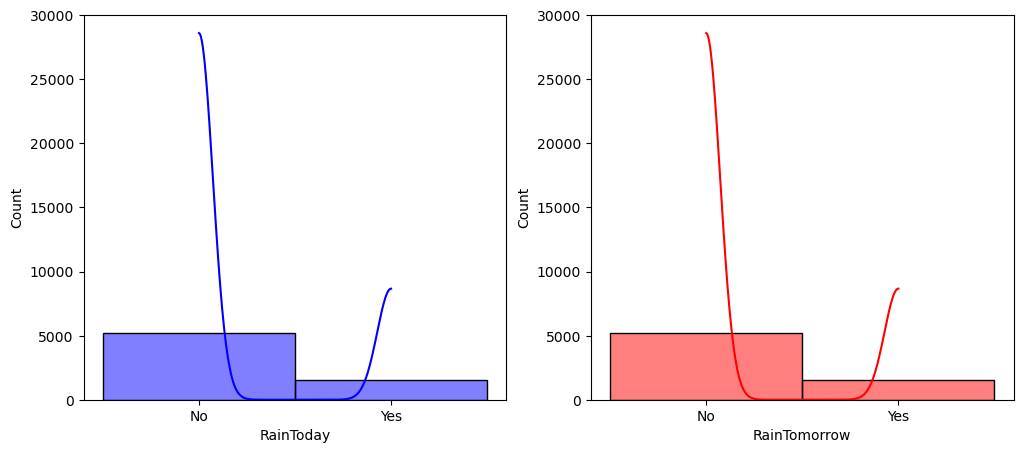

In [65]:
# Plotting histogram for (RainToday and RainTomorrow) both are target variables.
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['RainToday'],kde=True,color='b')
plt.subplot(1,2,2)
sns.histplot(df['RainTomorrow'],kde=True,color='r')
plt.show()

In [66]:
df['Location'].value_counts() 

PerthAirport    1204
Albury           907
Newcastle        822
Melbourne        811
Williamtown      615
CoffsHarbour     611
Brisbane         579
Penrith          482
Darwin           250
Wollongong       237
Adelaide         205
Uluru             39
Name: Location, dtype: int64

In [68]:
df['WindDir9am'].value_counts() 

N      1403
SW      590
NW      463
SE      439
ENE     397
WSW     394
SSW     368
NE      364
E       338
NNE     337
S       324
WNW     301
SSE     300
W       299
ESE     229
NNW     216
Name: WindDir9am, dtype: int64

In [69]:
df['WindDir3pm'].value_counts() 

SE     971
WSW    499
S      493
NE     480
SW     428
SSE    421
NW     400
W      399
E      392
WNW    389
ESE    363
N      354
ENE    348
NNE    305
SSW    277
NNW    243
Name: WindDir3pm, dtype: int64

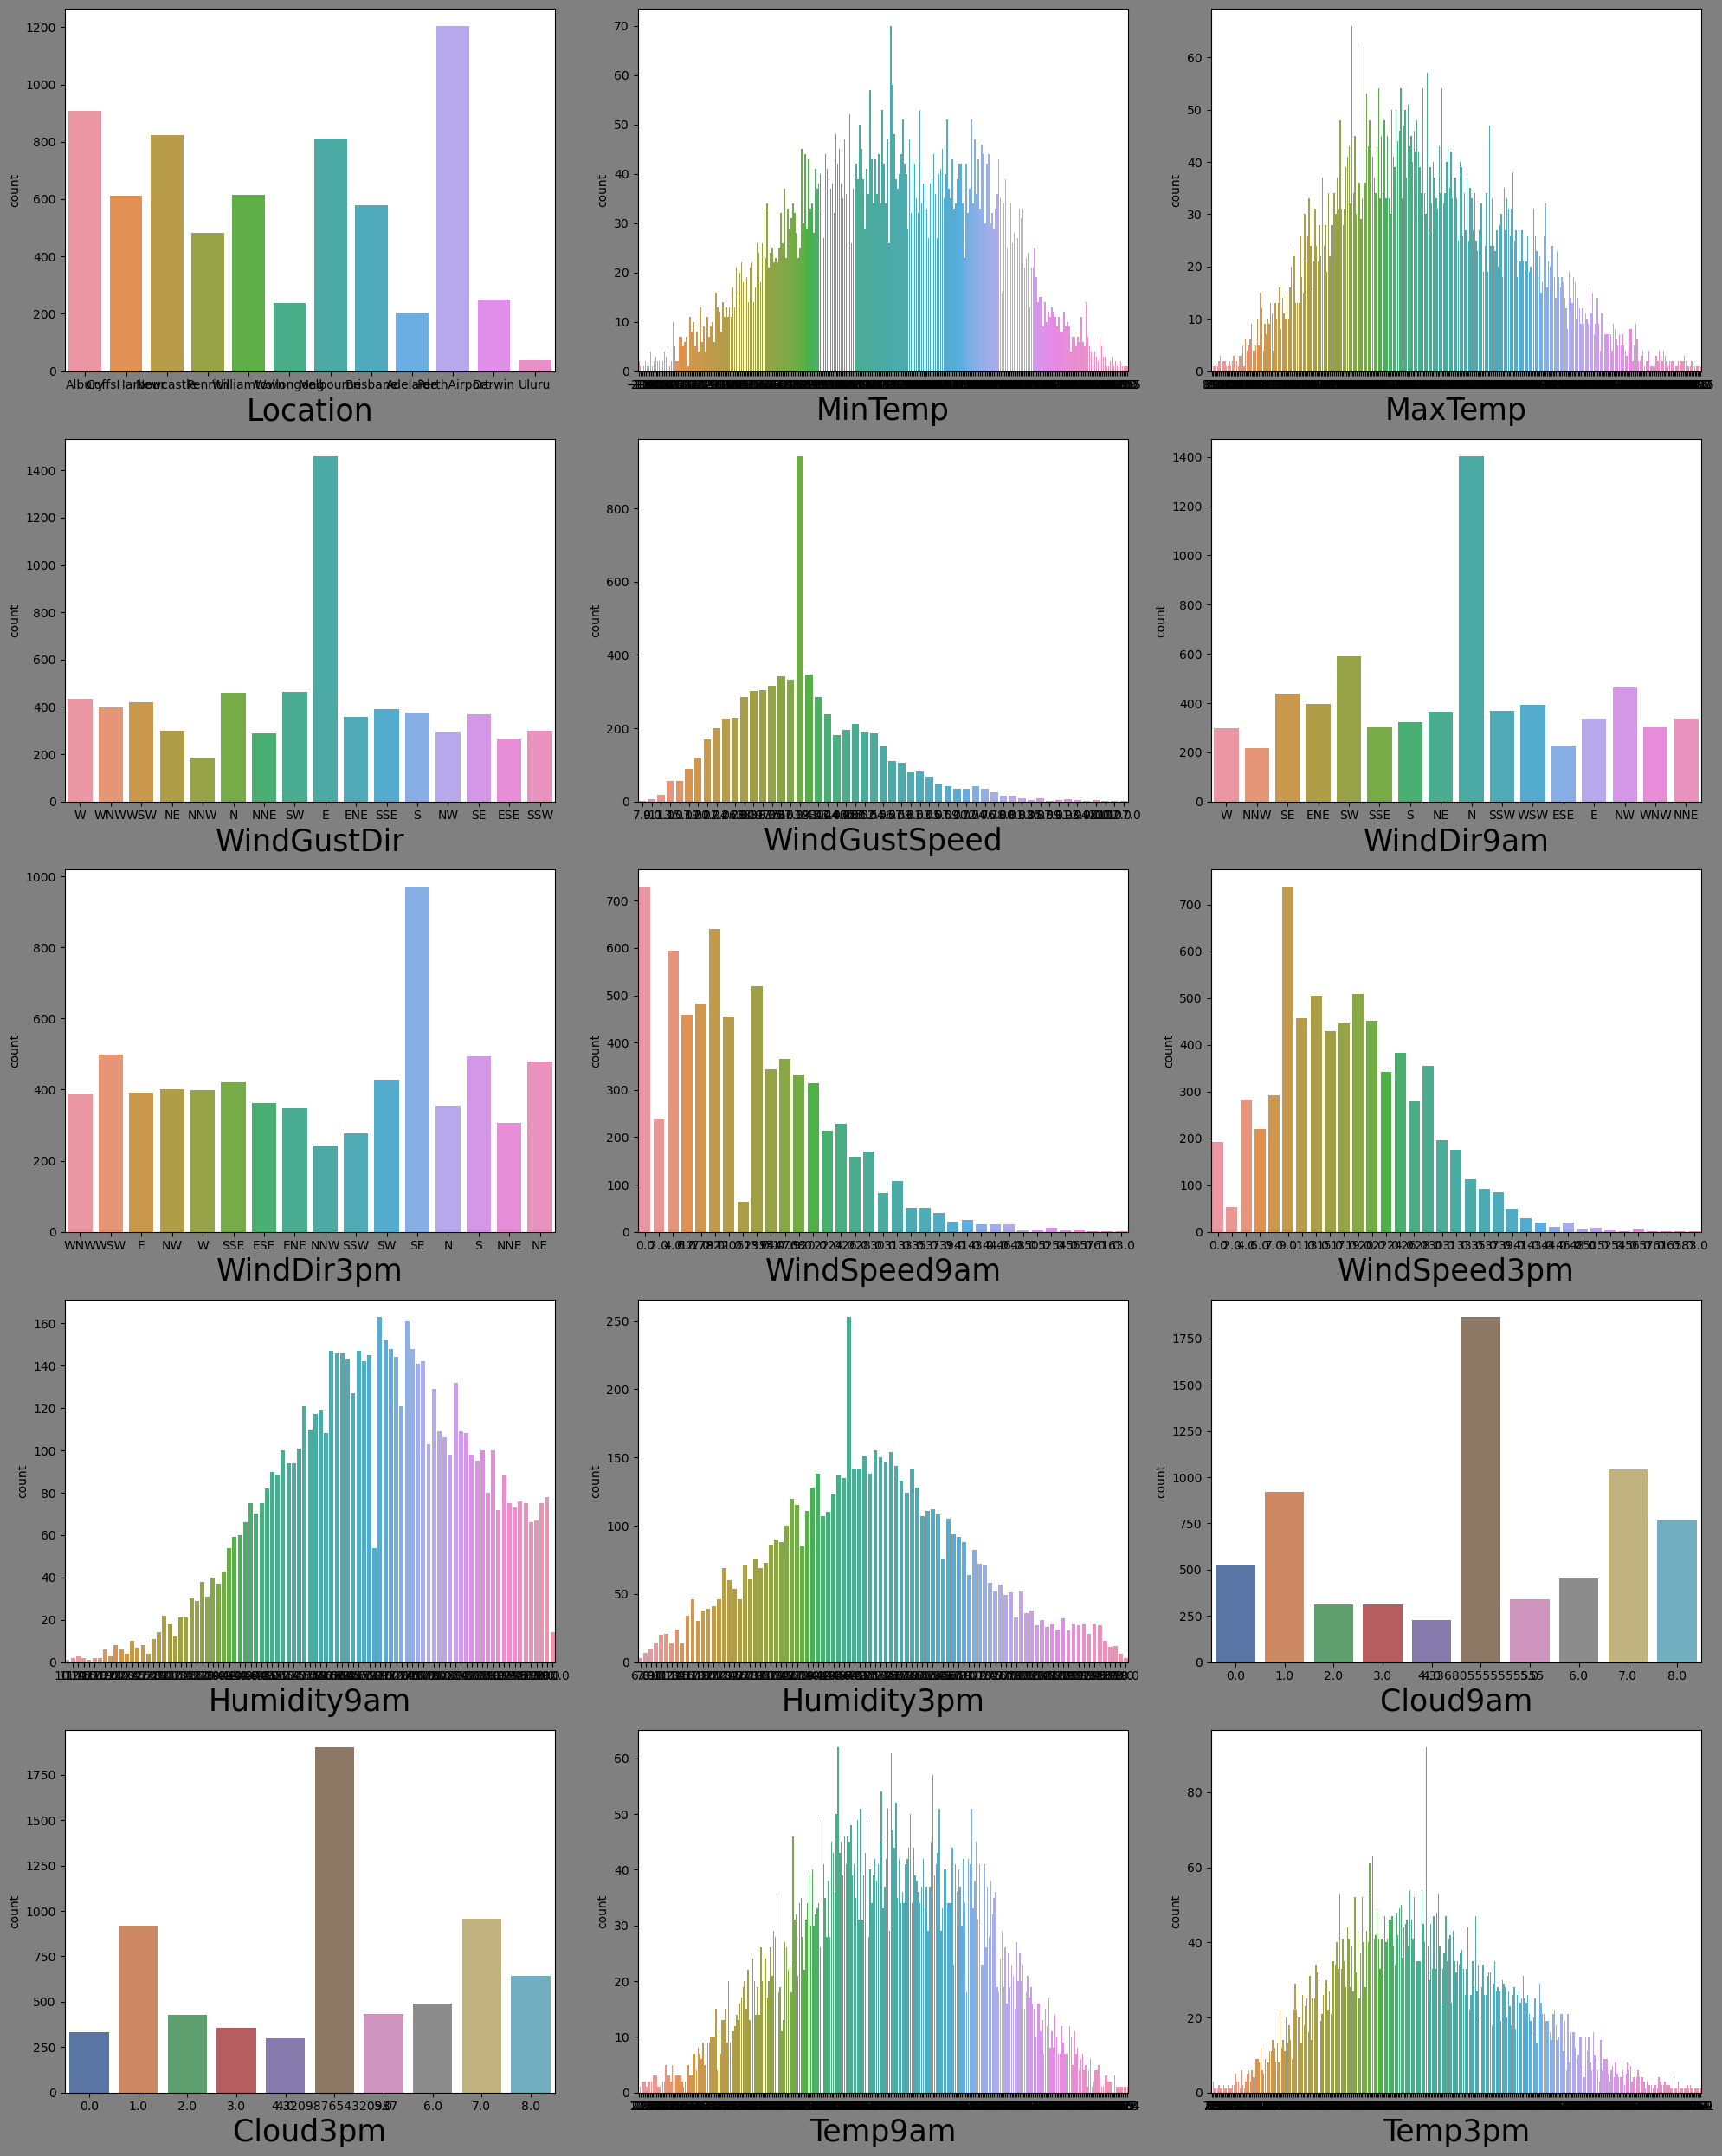

In [72]:
sns.set_palette('deep')
plt.figure(figsize=(20,25), facecolor='grey')

categories =['Location', 'MinTemp', 'MaxTemp',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
        'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm']

for i, category in enumerate(categories, 1):
    plt.subplot(5, 3, i)
    sns.countplot(data=df, x=category)
    plt.xlabel(category, fontsize=25)

plt.tight_layout()
plt.show()

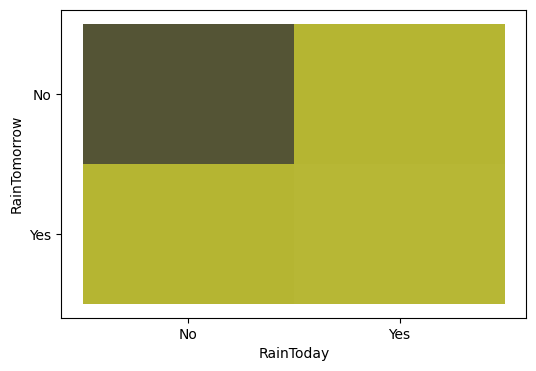

In [106]:
plt.figure(figsize=(6, 4))
sns.histplot(data=df, x='RainToday', y='RainTomorrow',color='y')
plt.show()

# Bivariate Analysis

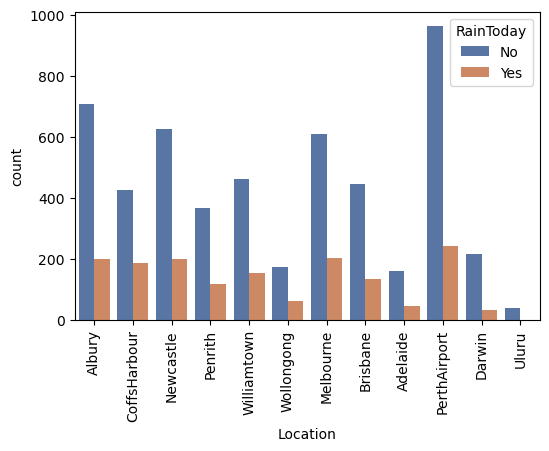

In [86]:
# Analysis with Target variable.
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Location', hue='RainToday')
plt.xticks(fontsize=10,rotation=90)
plt.show()

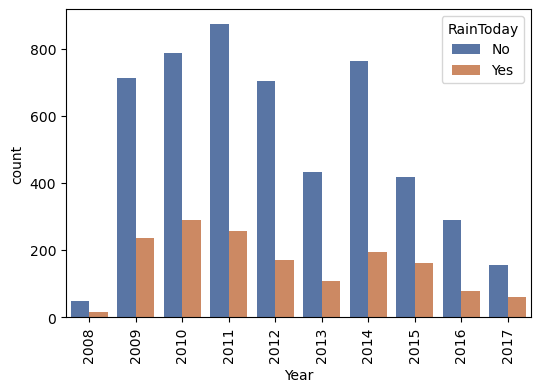

In [88]:
# Analysis with Target variable.
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Year', hue='RainToday')
plt.xticks(fontsize=10,rotation=90)
plt.show()

Comment -
* Maximum RainFall in 2009,2010 & 2011.
* Minimum Rainfall in 2008,2016 & 2017

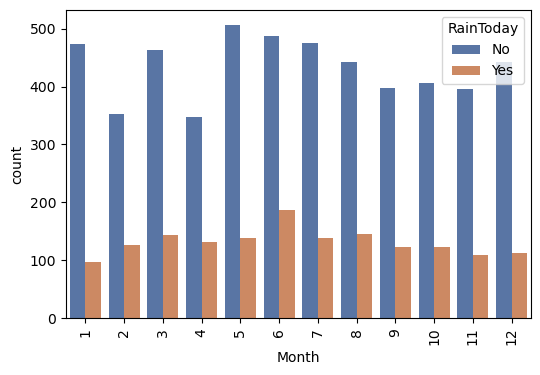

In [89]:
# Analysis with Target variable.
plt.figure(figsize=(6,4))
sns.countplot(data=df, x='Month', hue='RainToday')
plt.xticks(fontsize=10,rotation=90)
plt.show()

Comment -
* Maximum RainFall in  month of June.
* Minimum Rainfall in month of January.

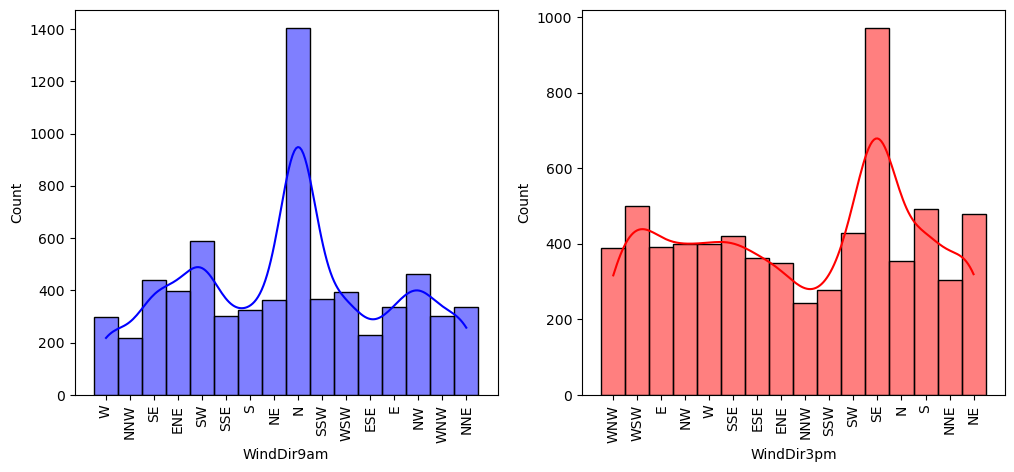

In [92]:
# Plotting histogram for Wind Direction at (9AM and 3PM)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['WindDir9am'],kde=True,color='b')
plt.xticks(fontsize=10,rotation=90)
plt.subplot(1,2,2)
sns.histplot(df['WindDir3pm'],kde=True,color='r')
plt.xticks(fontsize=10,rotation=90)

plt.show()

Comment- 
1) Wind direction at 9AM is in North Direction.
2) Wind direction at 3PM is in South East Direction Most of the time.

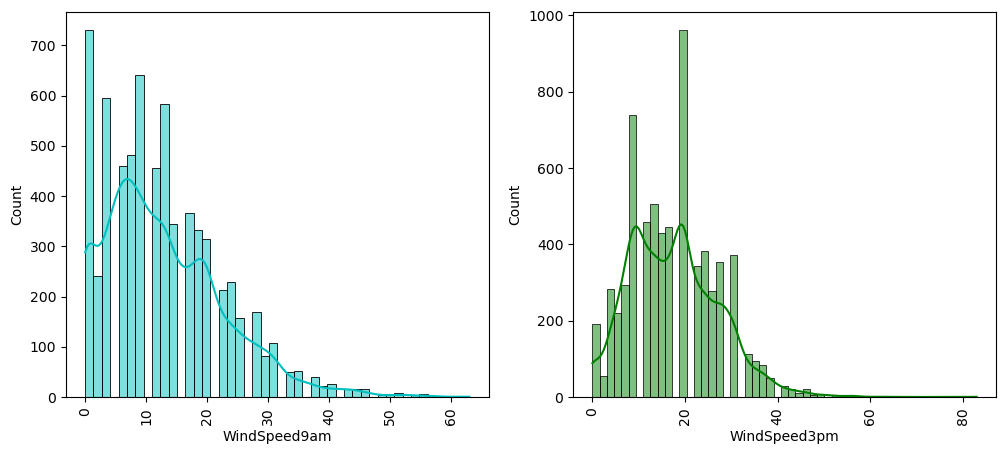

In [93]:
#-Plotting histogram for Wind Speed at (9AM and 3PM)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['WindSpeed9am'],kde=True,color='c')
plt.xticks(fontsize=10,rotation=90)

plt.subplot(1,2,2)
sns.histplot(df['WindSpeed3pm'],kde=True,color='g')
plt.xticks(fontsize=10,rotation=90)

plt.show()

Comment-
* Wind Speed at 9AM is Less than 10 Km/s.
* Wind Speed at 4PM is  20 Km/s Most of the time.

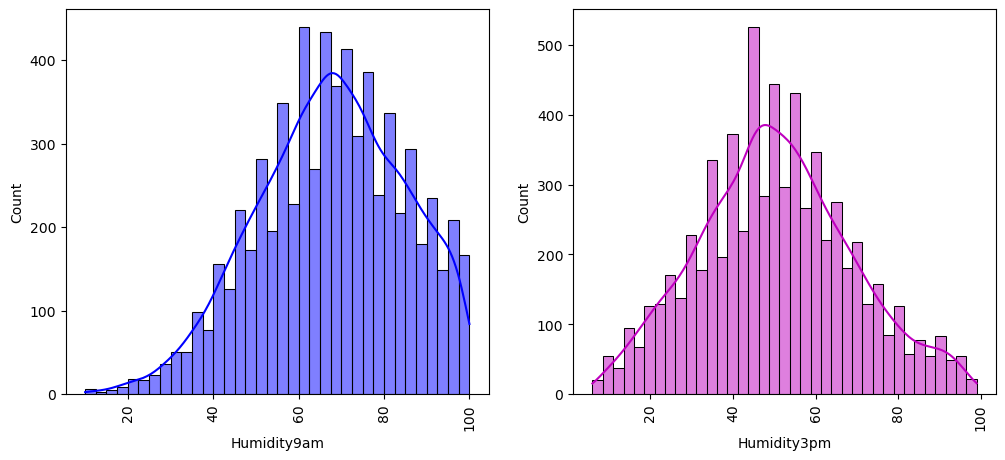

In [99]:
#-Plotting histogram for Humidity at (9AM and 3PM)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Humidity9am'],kde=True,color='b')
plt.xticks(fontsize=10,rotation=90)

plt.subplot(1,2,2)
sns.histplot(df['Humidity3pm'],kde=True,color='m')
plt.xticks(fontsize=10,rotation=90)

plt.show()

Comment-
* Humidity at 9AM is 60-88 .
* Humidity at 4PM is  40-65 Most of the time.

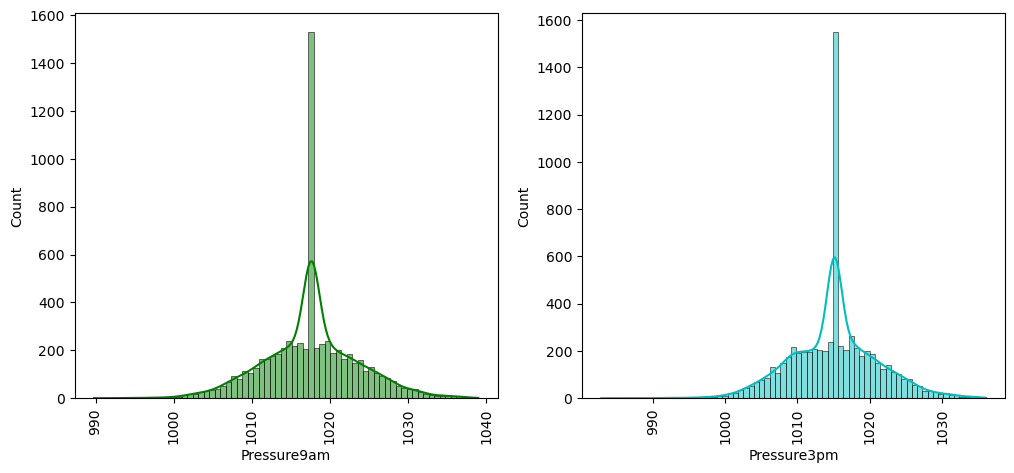

In [100]:
#-Plotting histogram for Pressure at (9AM and 3PM)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Pressure9am'],kde=True,color='g')
plt.xticks(fontsize=10,rotation=90)

plt.subplot(1,2,2)
sns.histplot(df['Pressure3pm'],kde=True,color='c')
plt.xticks(fontsize=10,rotation=90)

plt.show()

Comment-
* Pressure at 9AM is 1018 .
* Pressure at 3PM is  1015 .

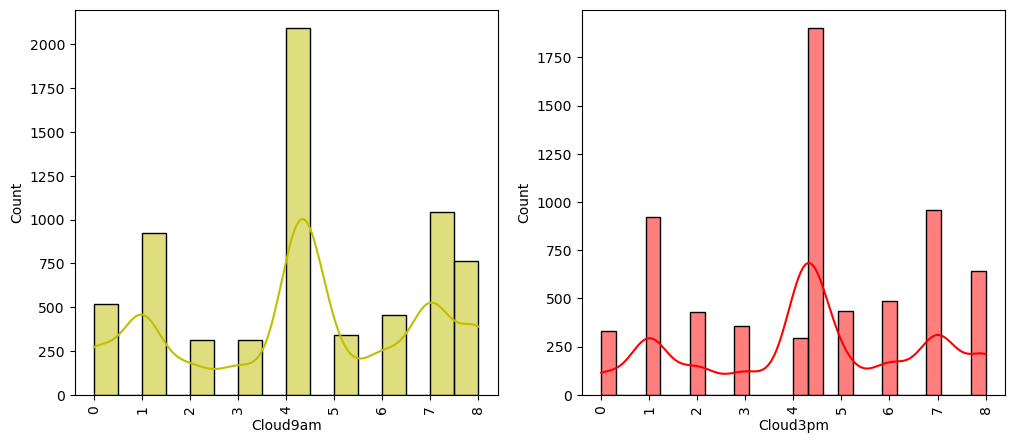

In [112]:
#-Plotting histogram for Cloud at (9AM and 3PM)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Cloud9am'],kde=True,color='y')
plt.xticks(fontsize=10,rotation=90)

plt.subplot(1,2,2)
sns.histplot(df['Cloud3pm'],kde=True,color='r')
plt.xticks(fontsize=10,rotation=90)

plt.show()

Comment -
* Density of Cloud at 9am And 3pm is Maximum  at 4.

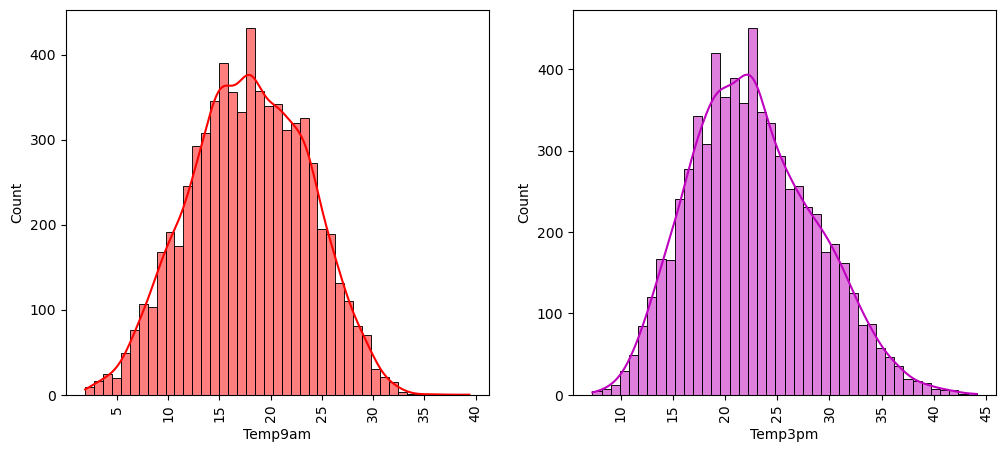

In [113]:
# Plotting histogram for Temperature  at (9AM and 3PM)
plt.figure(figsize=(12,5))
plt.subplot(1,2,1)
sns.histplot(df['Temp9am'],kde=True,color='r')
plt.xticks(fontsize=10,rotation=90)
plt.subplot(1,2,2)
sns.histplot(df['Temp3pm'],kde=True,color='m')
plt.xticks(fontsize=10,rotation=90)

plt.show()

Comment - Average Temperature high at (9am And 3pm) is 15 to 30

# Encoding Categorical Value to Numeric

In [125]:
from sklearn.preprocessing import LabelEncoder

columns_to_encode = ['Location','WindGustDir','WindDir9am','WindDir3pm']
label_encoder = LabelEncoder()

for col in columns_to_encode:
    df[col] = label_encoder.fit_transform(df[col])

# Statistical Analysis

In [128]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Location,6762.0,5.323721,3.099455,0.0,2.250000,6.000000,8.000000,11.0
MinTemp,6762.0,13.109145,5.540667,-2.0,9.000000,13.109145,17.400000,28.5
MaxTemp,6762.0,24.098345,6.130123,8.2,19.600000,23.500000,28.400000,45.5
Rainfall,6762.0,2.780148,10.482769,0.0,0.000000,0.000000,1.200000,371.0
Evaporation,6762.0,5.302395,3.343713,0.0,4.000000,5.302395,5.302395,145.0
Sunshine,6762.0,7.890896,2.733639,0.0,7.890896,7.890896,9.200000,13.9
WindGustDir,6762.0,6.610470,5.233746,0.0,1.000000,7.000000,12.000000,15.0
WindGustSpeed,6762.0,38.977663,13.376457,7.0,30.000000,38.977663,46.000000,107.0
WindDir9am,6762.0,7.013310,4.550702,0.0,3.000000,7.000000,11.000000,15.0
WindDir3pm,6762.0,7.842798,4.486894,0.0,4.000000,9.000000,12.000000,15.0


# Correlation Between Dataset

<Axes: >

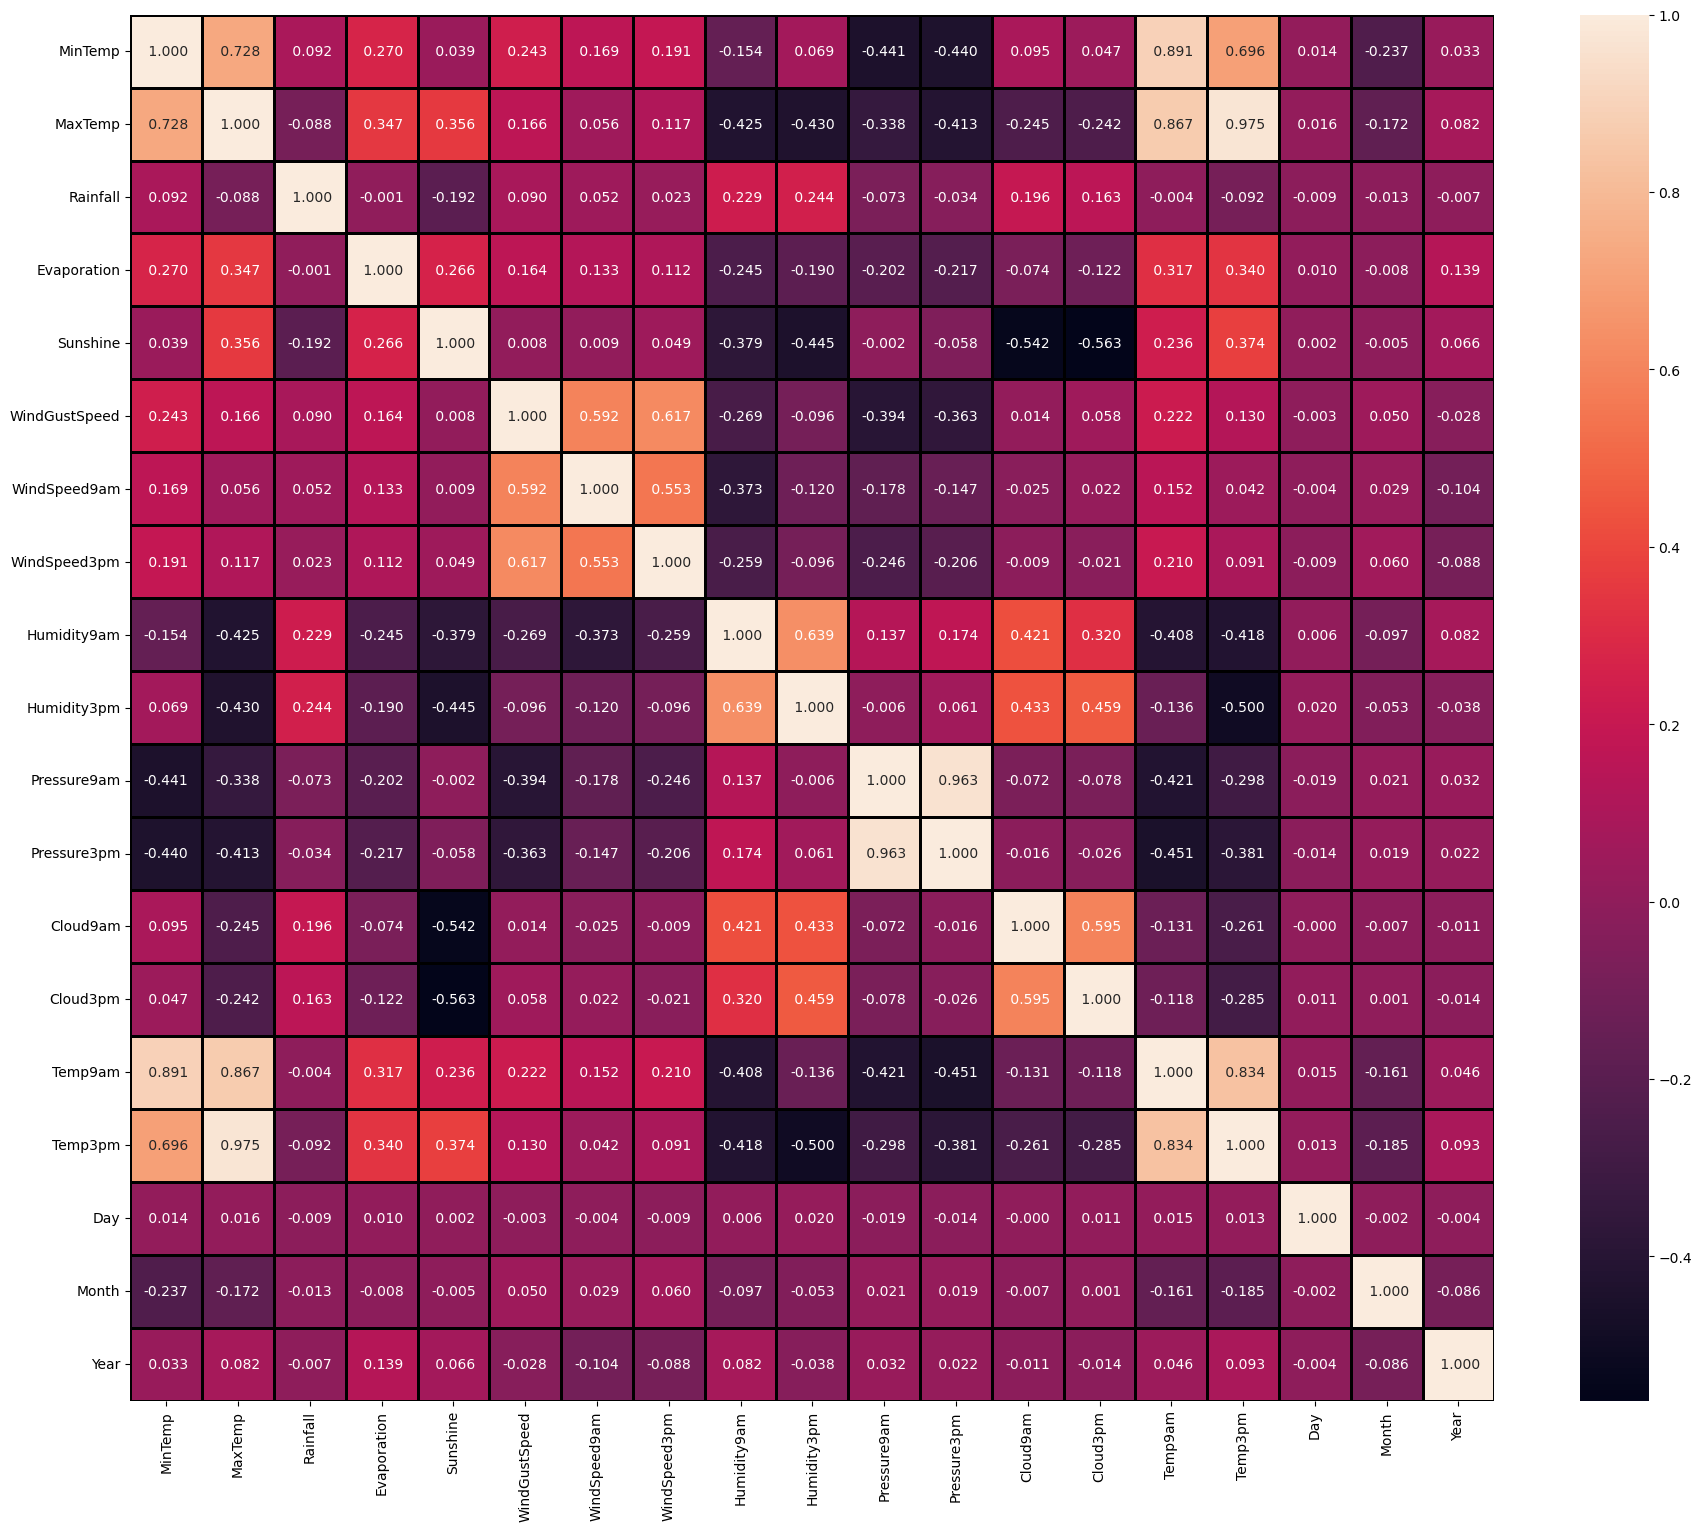

In [116]:
plt.figure(figsize=(22,18))
sns.heatmap(df.corr(),annot=True,linewidths=1,linecolor='black',fmt=' .3f' )

Comment -
* Windspeed & WindGustspeed is highly correlated .
* Temp3pm is correlated to minTemp  And MaxTemp.
* Sunshine is Correlated to MaxTemp.
* Cloud is Negativly correlated to Sunshine.
* Humidity and pressure3pm is Negatively  Correlated  to Temp3pm.

# Outlier Detection

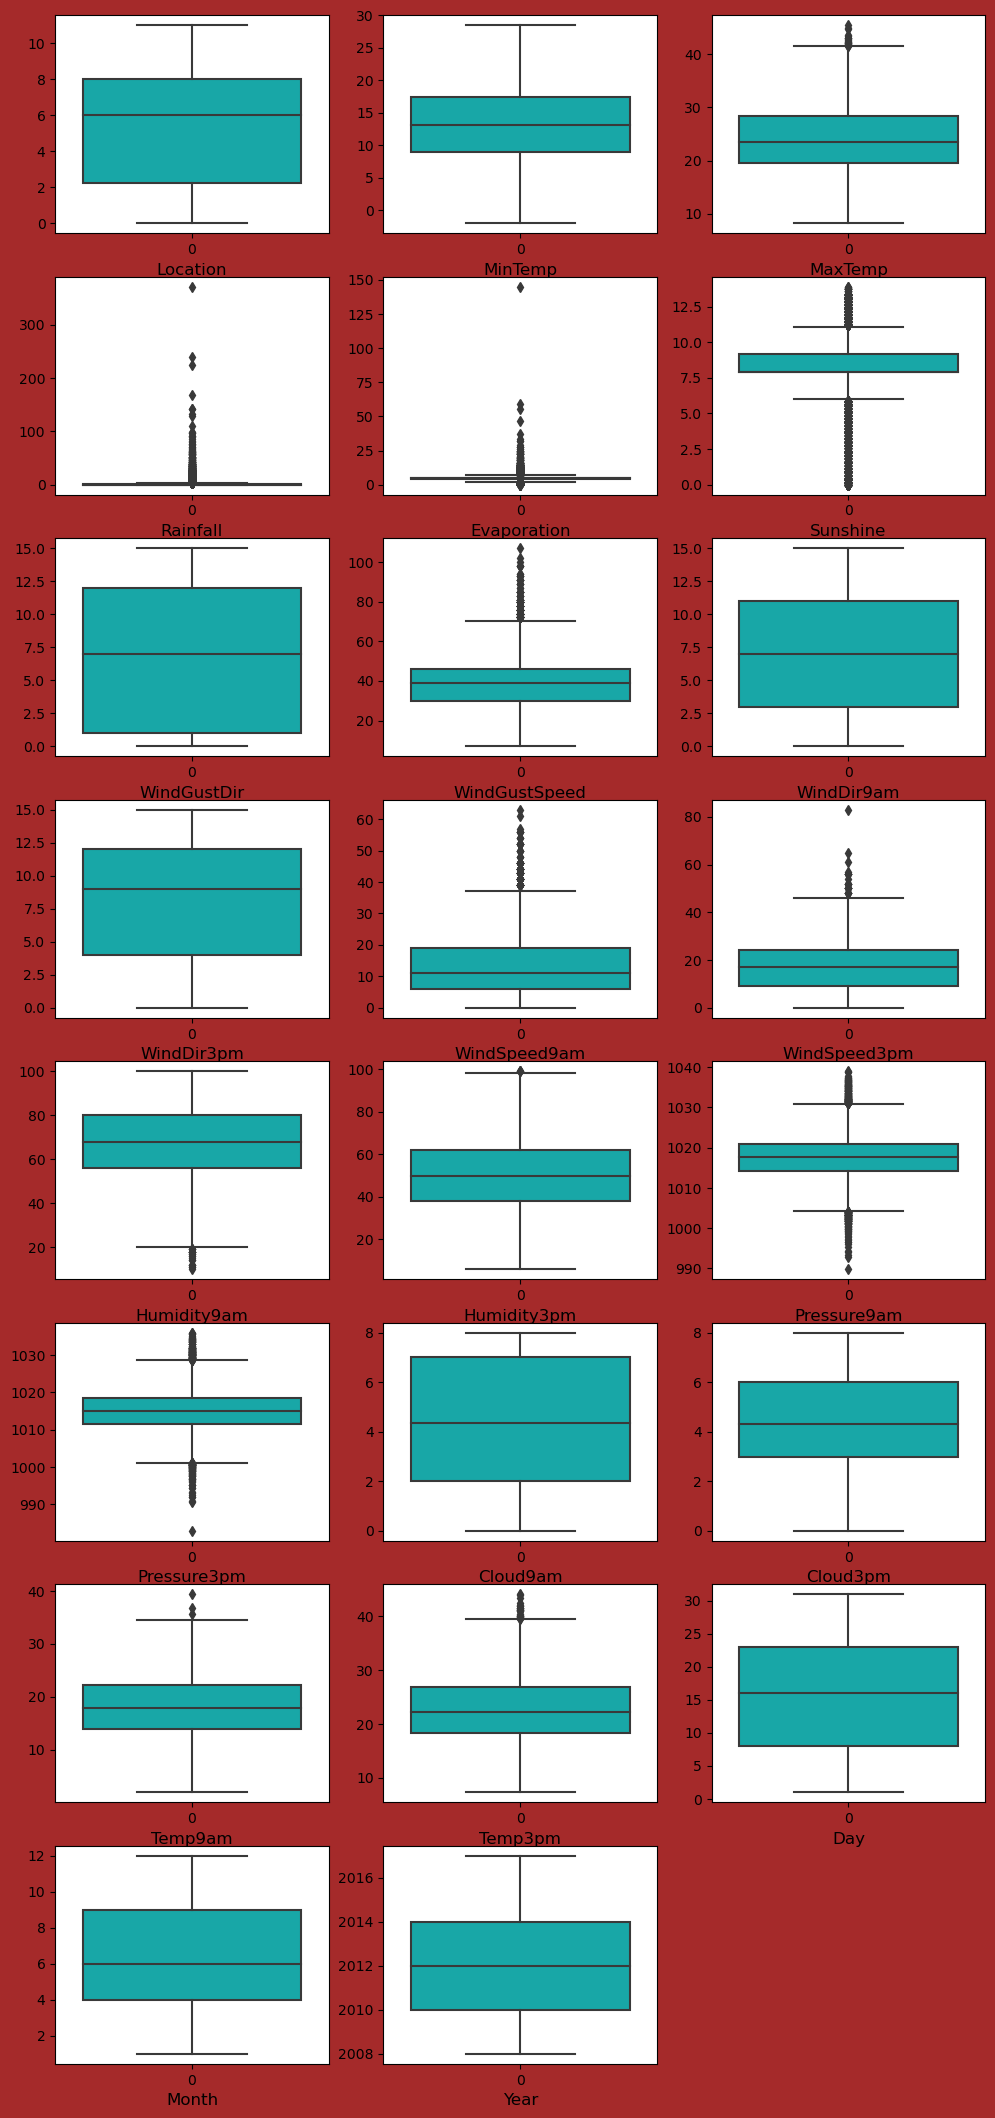

In [138]:
columns=['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'Day', 'Month', 'Year']
plt.figure(figsize=(12,30),facecolor='brown')
index=1
for column in columns:
    if index <=25:
        ax = plt.subplot(9,3,index)
        sns.boxplot(df[column], color='c')
        plt.xlabel(column,fontsize=12)
    index+=1
plt.show()

 Comment-
 * We can easily identify Outliers in above map.
 * These Column contain Outliers.[ 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
        'WindGustSpeed','WindSpeed9am', 'WindSpeed3pm', 'Humidity9am',
       'Pressure9am', 'Pressure3pm', 'Temp9am', 'Temp3pm']

# Outlier Removing 

In [133]:
from scipy.stats import zscore

# Specify the columns to remove outliers
columns_to_remove_outliers = [ 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed',
                              'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Pressure9am', 'Pressure3pm',
                              'Temp9am', 'Temp3pm']

# Calculate z-scores for each specified column
z_scores = df[columns_to_remove_outliers].apply(zscore)

# Set a threshold for z-scores ( 3)
threshold = 3

# Remove rows with z-scores beyond the threshold in any specified column
df1 = df[(z_scores.abs() < threshold).all(axis=1)]

# Checking Skewness Of Dataset

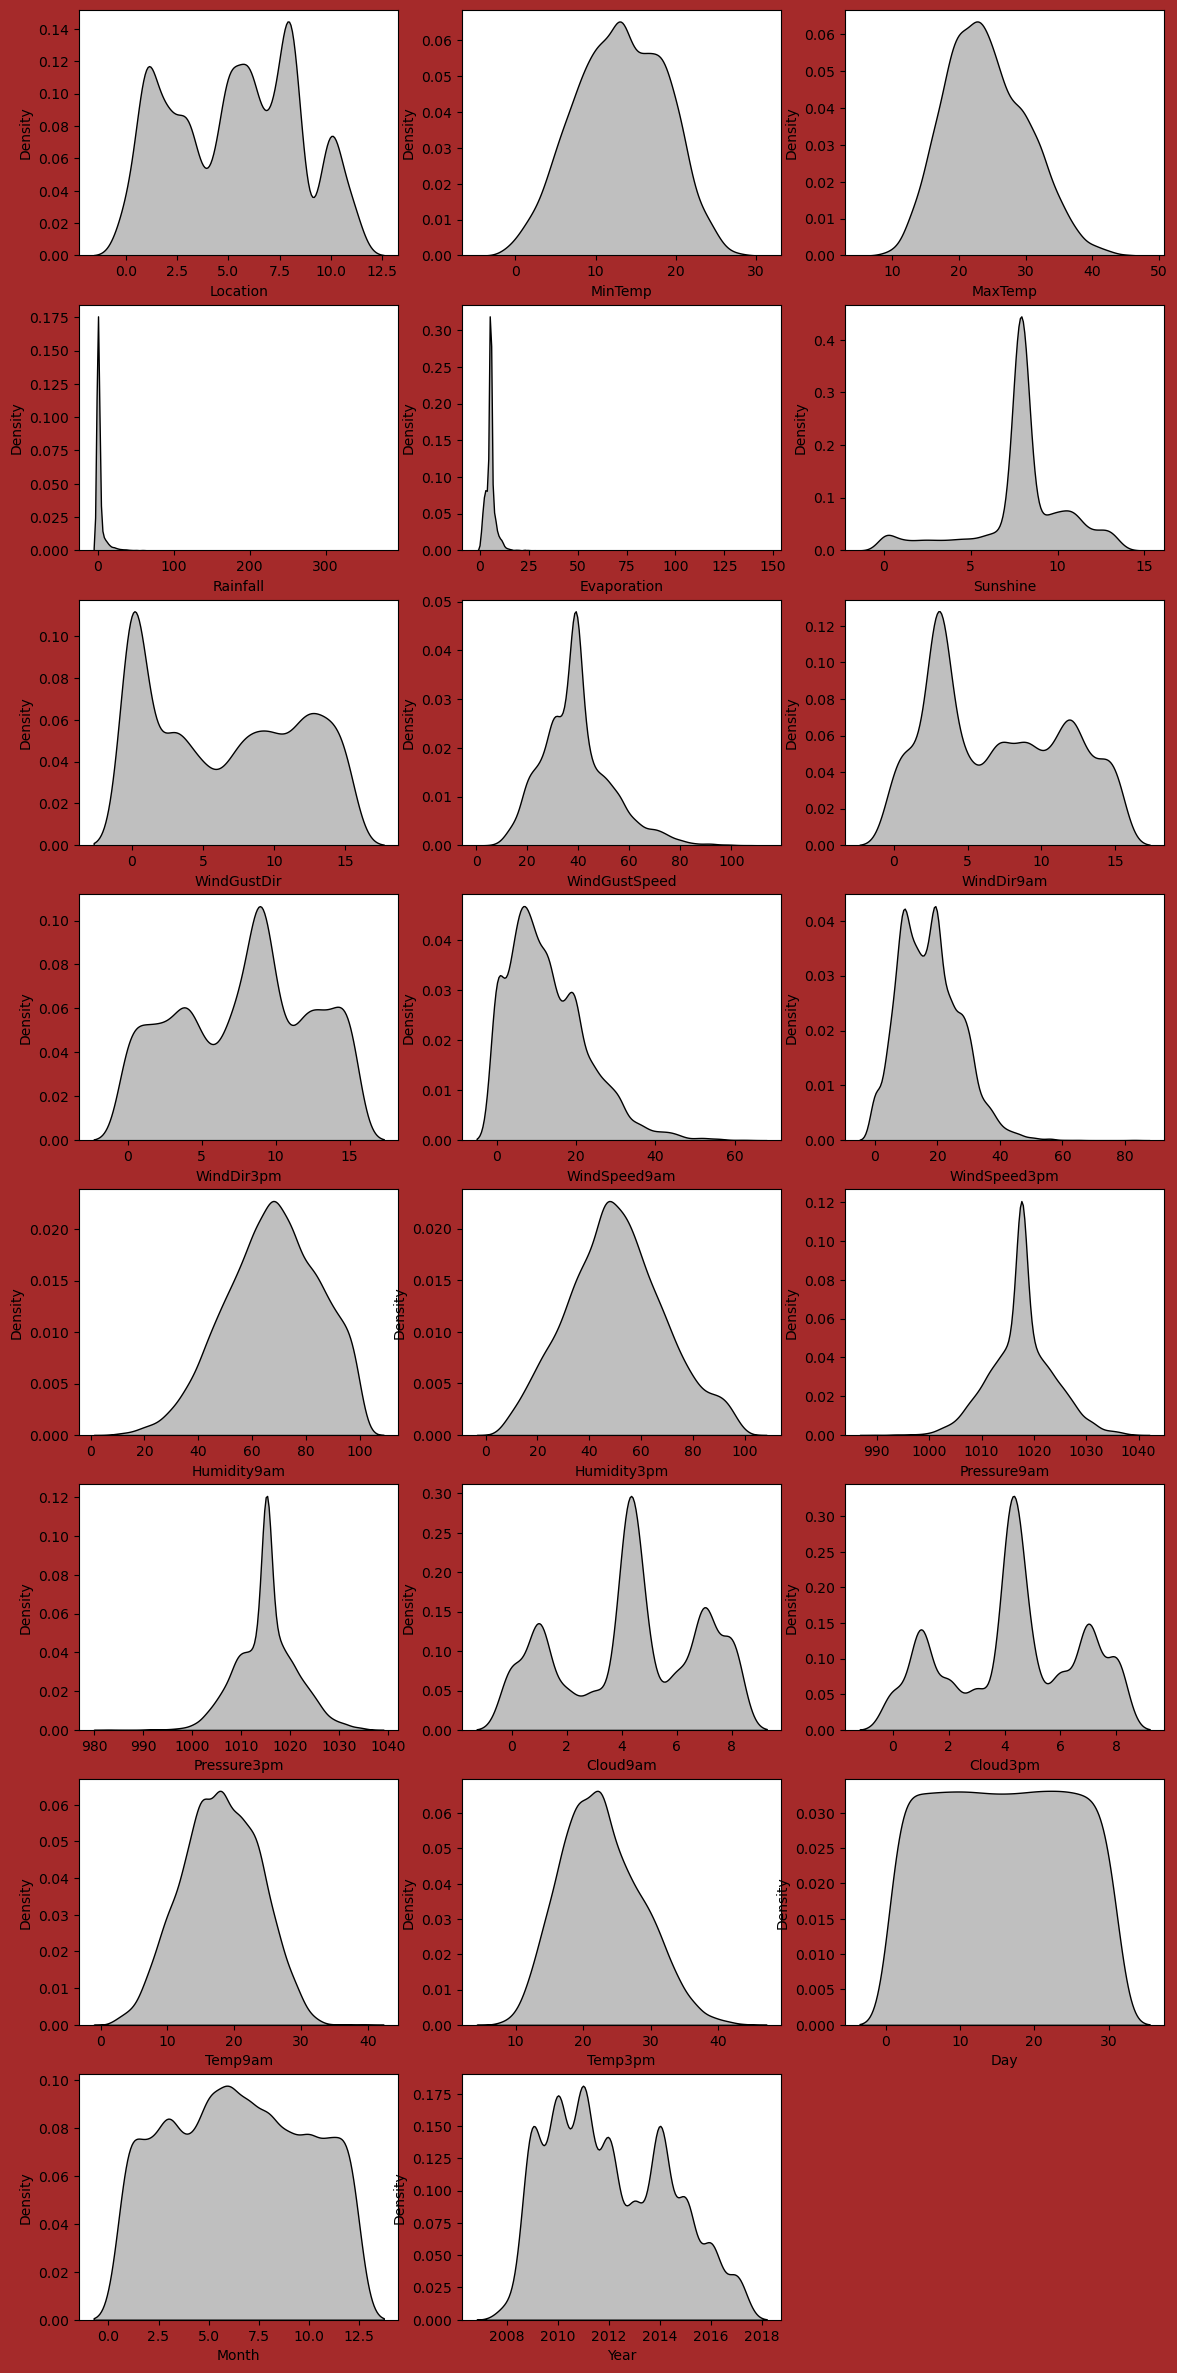

In [140]:
plt.figure(figsize=(14,30), facecolor='brown')
plotnumber=1
for column in columns:
    if plotnumber <=23:
        ax = plt.subplot(8,3,plotnumber)
        sns.distplot(df[column], color='k',hist=False,kde_kws={"shade": True})
        plt.xlabel(column,fontsize=10)
    plotnumber+=1
plt.show()

In [135]:
df.skew()

Location         -0.000009
MinTemp          -0.083706
MaxTemp           0.327598
Rainfall         13.650294
Evaporation      13.553368
Sunshine         -0.882147
WindGustDir       0.105287
WindGustSpeed     0.780437
WindDir9am        0.220355
WindDir3pm       -0.123726
WindSpeed9am      0.957036
WindSpeed3pm      0.569346
Humidity9am      -0.256177
Humidity3pm       0.160760
Pressure9am       0.022085
Pressure3pm       0.042990
Cloud9am         -0.215085
Cloud3pm         -0.162159
Temp9am          -0.047213
Temp3pm           0.348100
Day               0.006240
Month             0.021988
Year              0.354481
dtype: float64

# Removing Skewness

In [141]:
# columns with right-skewed data containing zeros
right_skewed =  ['Rainfall','Evaporation','WindSpeed9am']

from sklearn.preprocessing import PowerTransformer
scale = PowerTransformer(method='yeo-johnson')

# Transfroming skew data
df[right_skewed] = scale.fit_transform(df[right_skewed].values)

In [142]:
df.skew()

Location        -0.000009
MinTemp         -0.083706
MaxTemp          0.327598
Rainfall         0.955298
Evaporation      0.105928
Sunshine        -0.882147
WindGustDir      0.105287
WindGustSpeed    0.780437
WindDir9am       0.220355
WindDir3pm      -0.123726
WindSpeed9am    -0.099001
WindSpeed3pm     0.569346
Humidity9am     -0.256177
Humidity3pm      0.160760
Pressure9am      0.022085
Pressure3pm      0.042990
Cloud9am        -0.215085
Cloud3pm        -0.162159
Temp9am         -0.047213
Temp3pm          0.348100
Day              0.006240
Month            0.021988
Year             0.354481
dtype: float64

Comment - Skewness is Removed.

# Splitting Dataset

In [145]:
feature=['Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine',
       'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'Day', 'Month', 'Year']
target1=['RainToday']
target2=['RainTomorrow']

In [146]:
X=df[feature]
Y=df[target1]
y=df[target2]

# Feature Scaling

In [149]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X = pd.DataFrame(scaler.fit_transform(X), columns=X.columns)

# variance_inflation_factor

In [150]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
vif = pd.DataFrame()
vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]
vif['Features'] = X.columns
vif

,VIF,Features
0,1.633642,Location
1,9.059460,MinTemp
2,26.628847,MaxTemp
3,1.549659,Rainfall
4,1.516870,Evaporation
5,1.980936,Sunshine
6,1.559109,WindGustDir
7,2.243212,WindGustSpeed
8,1.337742,WindDir9am
9,1.423447,WindDir3pm


# Machine learning Model  [RainToday]

In [151]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score, confusion_matrix,classification_report,f1_score
from sklearn.metrics import  r2_score

In [153]:
# Spliting the data for training & testing.
for i in range(1,250):
    X_train, X_test, Y_train, Y_test = train_test_split(X, Y, random_state=i, test_size=.2)
    
X_train.shape

(5409, 23)

# LogisticRegression

In [154]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train,Y_train)
    Y_pred=lr.predict(X_test)
    acc=accuracy_score(Y_test,Y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu*100 ,'on Random_state', maxRS)

Best accuracy is 97.78270509977827 on Random_state 78


In [155]:
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(Y_test, Y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(Y_test, Y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(Y_test, Y_pred))

Accuracy Score of Logistics Regression : 0.9719142645971914


Confusion matrix of Logistics Regression : 
 [[999  26]
 [ 12 316]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

          No       0.99      0.97      0.98      1025
         Yes       0.92      0.96      0.94       328

    accuracy                           0.97      1353
   macro avg       0.96      0.97      0.96      1353
weighted avg       0.97      0.97      0.97      1353



# Model Classification 

In [156]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

In [157]:
models = [SVC(), GaussianNB(), DecisionTreeClassifier(), 
          KNeighborsClassifier(n_neighbors=3), RandomForestClassifier(), ExtraTreesClassifier()]

for model in models:
    model.fit(X_train, Y_train)
    Y_pred = model.predict(X_test)
    print('\033[1m' + 'Classification ML Algorithm Evaluation Matrix for', model.__class__.__name__ + ':' + '\033[0m')
    print('\n')
    print('\033[1m' + 'Accuracy Score :' + '\033[0m\n', accuracy_score(Y_test, Y_pred))
    print('\n')
    print('\033[1m' + 'Confusion matrix :' + '\033[0m \n', confusion_matrix(Y_test, Y_pred))
    print('\n')
    print('\033[1m' + 'Classification Report :' + '\033[0m \n', classification_report(Y_test, Y_pred))
    print('\n')
    
    print('='*100)

Classification ML Algorithm Evaluation Matrix for SVC:


Accuracy Score :
 0.9719142645971914


Confusion matrix : 
 [[995  30]
 [  8 320]]


Classification Report : 
               precision    recall  f1-score   support

          No       0.99      0.97      0.98      1025
         Yes       0.91      0.98      0.94       328

    accuracy                           0.97      1353
   macro avg       0.95      0.97      0.96      1353
weighted avg       0.97      0.97      0.97      1353



Classification ML Algorithm Evaluation Matrix for GaussianNB:


Accuracy Score :
 0.967479674796748


Confusion matrix : 
 [[986  39]
 [  5 323]]


Classification Report : 
               precision    recall  f1-score   support

          No       0.99      0.96      0.98      1025
         Yes       0.89      0.98      0.94       328

    accuracy                           0.97      1353
   macro avg       0.94      0.97      0.96      1353
weighted avg       0.97      0.97      0.97      1353





# Hyperparameter Tuning 

In [158]:
from sklearn.model_selection import GridSearchCV

In [159]:
parameter={'n_estimators':[200,400],'max_depth':[2,3],'min_samples_leaf':[1,2],'min_samples_split':[2,2.5],
         'criterion':['gini']}

In [161]:
grid_search = GridSearchCV(RandomForestClassifier(),parameter, cv=5, scoring='accuracy',verbose=5)
grid_search.fit(X_train, Y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.873 total time=   1.1s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.876 total time=   1.1s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.880 total time=   1.1s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.881 total time=   1.1s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.902 total time=   1.1s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=0.872 total time=   5.7s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=0.880 total time=   3.6s
[CV 3/5]

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 2.5],
                         'n_estimators': [200, 400]},
             scoring='accuracy', verbose=5)

In [162]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 2, 'min_samples_split': 2, 'n_estimators': 200}


# Final Model for [RainToday]

In [163]:
model=RandomForestClassifier(criterion = 'gini', max_depth = 3, min_samples_leaf = 2, min_samples_split = 2, n_estimators = 200)

In [220]:
model.fit(X_train,Y_train)
pred = model.predict(X_test)
print('\033[1m'+'RandomForestClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of RandomForestClassifier :'+'\033[0m', accuracy_score(Y_test, pred))
print('\n')
print('\033[1m'+'Confusion matrix ofRandomForestClassifier :'+'\033[0m \n',confusion_matrix(Y_test, pred))
print('\n')
print('\033[1m'+'classification Report of RandomForestClassifier '+'\033[0m \n',classification_report(Y_test, pred))

RandomForestClassifier Evaluation


Accuracy Score of RandomForestClassifier : 0.9408721359940873


Confusion matrix ofRandomForestClassifier : 
 [[1016    9]
 [  71  257]]


classification Report of RandomForestClassifier  
               precision    recall  f1-score   support

          No       0.93      0.99      0.96      1025
         Yes       0.97      0.78      0.87       328

    accuracy                           0.94      1353
   macro avg       0.95      0.89      0.91      1353
weighted avg       0.94      0.94      0.94      1353



In [175]:
Y_test

array([['No'],
       ['No'],
       ['No'],
       ...,
       ['No'],
       ['No'],
       ['No']], dtype=object)

In [221]:
# Create the DataFrame
prediction = pd.DataFrame({'predicted values': pred.flatten(), 'actual values': Y_test.flatten()})
prediction

,predicted values,actual values
0,No,No
1,No,No
2,No,No
3,No,No
4,Yes,Yes
...,...,...
1348,No,No
1349,No,No
1350,No,No
1351,No,No


===================================================================================================================

# Machine learning Model  [RainTomorrow]

In [179]:
# Spliting the data for training & testing.
for i in range(1,250):
    X_train, X_test, y_train, y_test = train_test_split(X,y , random_state=i, test_size=.2)
    
X_train.shape

(5409, 23)

# LogisticRegression

In [188]:
from sklearn.linear_model import LogisticRegression
maxAccu=0
maxRS=0
for i in range(1,250):
    X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2, random_state=i)
    lr=LogisticRegression()
    lr.fit(X_train,y_train)
    y_pred=lr.predict(X_test)
    acc=accuracy_score(y_test,y_pred)
    if acc>maxAccu:
        maxAccu=acc
        maxRS=i
print('Best accuracy is', maxAccu*100 ,'on Random_state', maxRS)

Best accuracy is 86.32668144863267 on Random_state 206


In [191]:
print('\033[1m'+'Accuracy Score of Logistics Regression :'+'\033[0m', accuracy_score(y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix of Logistics Regression :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of Logistics Regression'+'\033[0m \n',classification_report(y_test, y_pred))

Accuracy Score of Logistics Regression : 0.8425720620842572


Confusion matrix of Logistics Regression : 
 [[968  64]
 [149 172]]


classification Report of Logistics Regression 
               precision    recall  f1-score   support

          No       0.87      0.94      0.90      1032
         Yes       0.73      0.54      0.62       321

    accuracy                           0.84      1353
   macro avg       0.80      0.74      0.76      1353
weighted avg       0.83      0.84      0.83      1353



# Model Classification 

In [185]:
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.neighbors import KNeighborsClassifier

In [187]:
models = [SVC(), GaussianNB(), DecisionTreeClassifier(), 
          KNeighborsClassifier(n_neighbors=3), RandomForestClassifier(), ExtraTreesClassifier()]

for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print('\033[1m' + 'Classification ML Algorithm Evaluation Matrix for', model.__class__.__name__ + ':' + '\033[0m')
    print('\n')
    print('\033[1m' + 'Accuracy Score :' + '\033[0m\n', accuracy_score(y_test, y_pred))
    print('\n')
    print('\033[1m' + 'Confusion matrix :' + '\033[0m \n', confusion_matrix(y_test, y_pred))
    print('\n')
    print('\033[1m' + 'Classification Report :' + '\033[0m \n', classification_report(y_test, y_pred))
    print('\n')
    print('='*100)

Classification ML Algorithm Evaluation Matrix for SVC:


Accuracy Score :
 0.8588322246858833


Confusion matrix : 
 [[984  48]
 [143 178]]


Classification Report : 
               precision    recall  f1-score   support

          No       0.87      0.95      0.91      1032
         Yes       0.79      0.55      0.65       321

    accuracy                           0.86      1353
   macro avg       0.83      0.75      0.78      1353
weighted avg       0.85      0.86      0.85      1353



Classification ML Algorithm Evaluation Matrix for GaussianNB:


Accuracy Score :
 0.8004434589800443


Confusion matrix : 
 [[854 178]
 [ 92 229]]


Classification Report : 
               precision    recall  f1-score   support

          No       0.90      0.83      0.86      1032
         Yes       0.56      0.71      0.63       321

    accuracy                           0.80      1353
   macro avg       0.73      0.77      0.75      1353
weighted avg       0.82      0.80      0.81      1353




# Hyperparameter Tuning 

In [192]:
from sklearn.model_selection import GridSearchCV

In [209]:
parameter={'n_estimators':[200,400],'max_depth':[2,3],'min_samples_leaf':[1,2],'min_samples_split':[2,2.5],
         'criterion':['gini']}

In [214]:
grid_search = GridSearchCV(RandomForestClassifier(),parameter, cv=5, scoring='accuracy',verbose=5)
grid_search.fit(X_train, y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.799 total time=   1.2s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.799 total time=   1.2s
[CV 3/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.807 total time=   1.2s
[CV 4/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.807 total time=   1.1s
[CV 5/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=200;, score=0.791 total time=   1.1s
[CV 1/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=0.796 total time=   2.3s
[CV 2/5] END criterion=gini, max_depth=2, min_samples_leaf=1, min_samples_split=2, n_estimators=400;, score=0.794 total time=   2.3s
[CV 3/5]

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini'], 'max_depth': [2, 3],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 2.5],
                         'n_estimators': [200, 400]},
             scoring='accuracy', verbose=5)

In [216]:
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

Best Hyperparameters: {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}


# Final Model for [RainTomorrow]

In [217]:
model=RandomForestClassifier(criterion = 'gini', max_depth = 3, min_samples_leaf = 1, min_samples_split = 2, n_estimators = 200)

In [228]:
model.fit(X_train,y_train)
y_pred = model.predict(X_test)
print('\033[1m'+'RandomForestClassifier Evaluation'+'\033[0m')
print('\n')
print('\033[1m'+'Accuracy Score of RandomForestClassifier :'+'\033[0m', accuracy_score(y_test, y_pred))
print('\n')
print('\033[1m'+'Confusion matrix ofRandomForestClassifier :'+'\033[0m \n',confusion_matrix(y_test, y_pred))
print('\n')
print('\033[1m'+'classification Report of RandomForestClassifier '+'\033[0m \n',classification_report(y_test, y_pred))

RandomForestClassifier Evaluation


Accuracy Score of RandomForestClassifier : 0.8226164079822617


Confusion matrix ofRandomForestClassifier : 
 [[1012   20]
 [ 220  101]]


classification Report of RandomForestClassifier  
               precision    recall  f1-score   support

          No       0.82      0.98      0.89      1032
         Yes       0.83      0.31      0.46       321

    accuracy                           0.82      1353
   macro avg       0.83      0.65      0.68      1353
weighted avg       0.82      0.82      0.79      1353



In [235]:
y_pred = np.squeeze(y_pred)
y_test = np.squeeze(y_test)

# Create the DataFrame
prediction = pd.DataFrame({'predicted values': y_pred, 'actual values': y_test})
prediction

,predicted values,actual values
6781,No,Yes
7587,Yes,Yes
3524,No,No
110,No,No
3084,Yes,Yes
...,...,...
757,No,No
5257,No,No
8093,No,No
3282,No,No


#  Best  Model Saving

In [237]:
import joblib
joblib.dump(model,'Rainfall_Weather_Forecasting.pkl')

['Rainfall_Weather_Forecasting.pkl']